In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [2]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# If Fare is missing (only in test data), fill with median
if 'Fare' in df.columns:
    df['Fare'].fillna(df['Fare'].median(), inplace=True)


/tmp/ipython-input-2683662290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2683662290.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [3]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# Encode 'Sex' (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [6]:
# One-hot encode 'Embarked' → Keep ALL 3 columns: C, Q, S
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500       False       False   
1         1       1    1  38.0      1      0  71.2833        True       False   
2         1       3    1  26.0      0      0   7.9250       False       False   
3         1       1    1  35.0      1      0  53.1000       False       False   
4         0       3    0  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


## 1.Generate summary statistics (mean, median, std, etc)

In [7]:
print(df.describe())


         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


# 2. Create histograms and boxplots for numeric features.

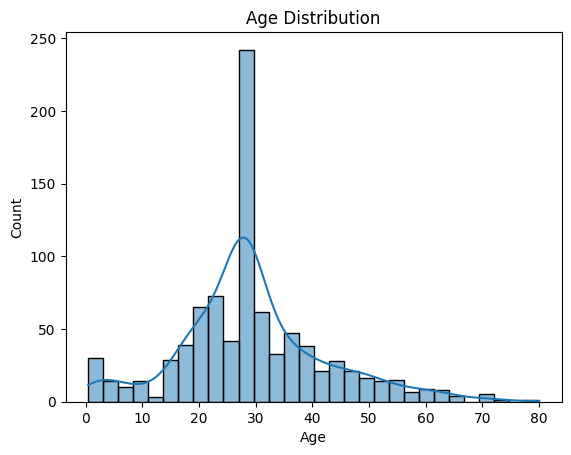

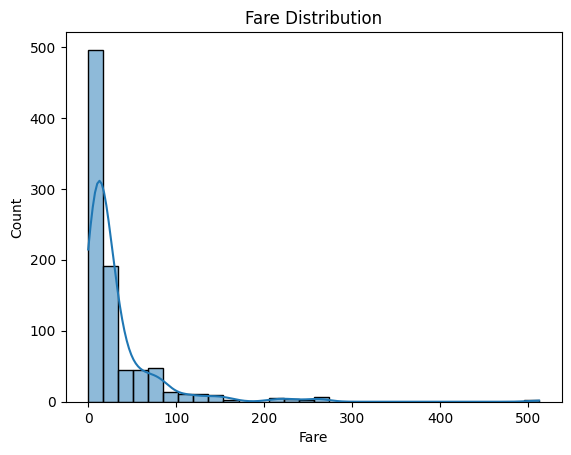

In [8]:
# Histogram for Age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Histogram for Fare
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()


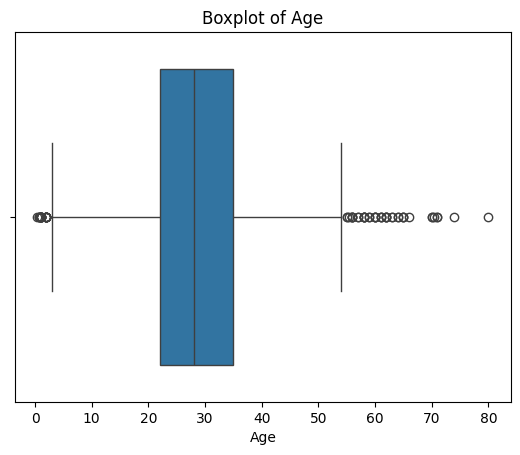

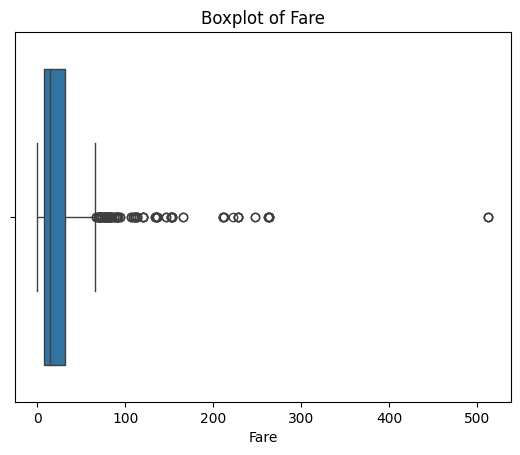

In [9]:
# Boxplot for Age
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()


# 3. Use pairplot/correlation matrix for feature relationships.

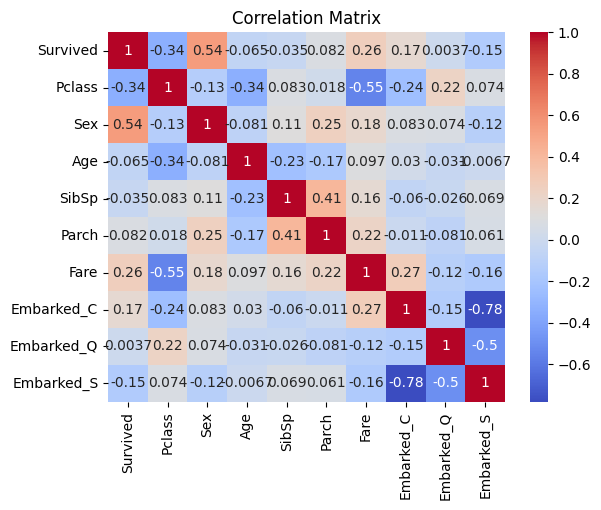

In [10]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


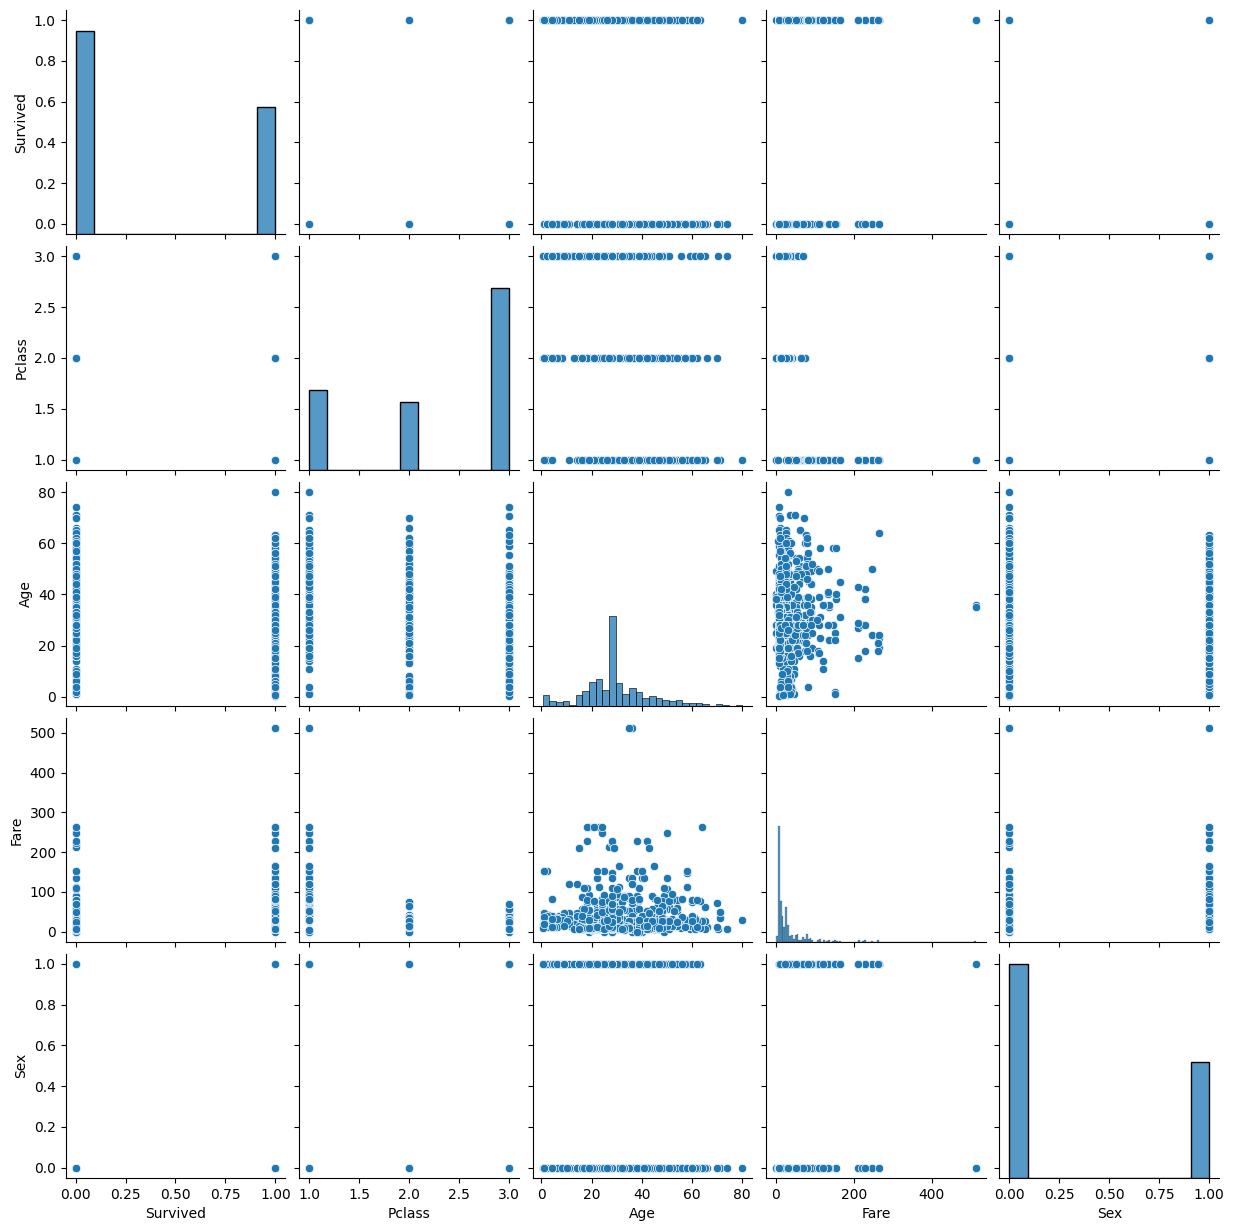

In [11]:
# Pairplot for selected features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']])
plt.show()


# 4. Identify patterns, trends, or anomalies in the data.

Survival and Passenger Class: Passengers in 1st class had a significantly higher survival rate, while those in 3rd class had the lowest, indicating class-based survival disparity.

Gender Trend: Female passengers had a much higher survival rate compared to males, highlighting the prioritization of women during rescue.

Age Pattern: Younger passengers, especially children, showed better survival rates, while some outliers among older age groups survived as well.

Fare Trend: Passengers who paid higher fares (likely 1st class) were more likely to survive; Fare values showed strong right skew with several outliers, indicating a few passengers paid substantially more.

Embarked Port Insight: Passengers boarding from Cherbourg (Embarked=C) had better survival outcomes, likely due to higher-class boarding distribution at that port.

Outliers Detected: Fare displayed multiple high-value outliers, and Age had few extreme old-age outliers — both detected via boxplots.

Correlation Observation: Fare and Pclass showed a moderate negative correlation, confirming that higher class passengers paid more, and this correlated with survival.





# 5. Make basic feature-level inferences from visuals.


Age: The majority of passengers were young to middle-aged, and children showed higher survival rates. Age distribution was centered around the mean, with a few elderly outliers.

Fare: Most passengers paid low fares, but there were a few high-paying outliers, suggesting wealthier passengers in 1st class. Higher fare often correlated with better survival.

Pclass (Passenger Class): 1st class passengers had higher survival rates, while 3rd class passengers had lower survival, indicating a class-based disparity in survival.

Sex: Females had a notably higher survival rate than males. Visuals clearly showed that gender was a strong predictor of survival.

Embarked: Passengers who boarded from Cherbourg (Embarked_C) tended to have better survival outcomes, likely due to a higher proportion of 1st class passengers from that port.

Outliers: Fare and Age both contained outliers, as shown in boxplots. These outliers were handled using IQR-based filtering to avoid skewed analysis.

